Collect Data

In [2]:

from collect_data import collect
#collect tweets
#collect('tweets_test.csv') #added the test in the name in case you run it again

In [3]:
import pandas as pd

data = pd.read_csv('tweets.csv')
extracted_data = data[['Text']]
# Specify the file path for the CSV file
csv_file = 'text_data.csv'

# Save the DataFrame to a CSV file
extracted_data.to_csv(csv_file, sep=',', index=False)

# Print the modified DataFrame
print(extracted_data)


                                                   Text
0          On dirait squid game https://t.co/m1sxB5WKFn
1     RT @shawnmayj: 🎁#RippleApesClub #Giveaways🎁\n\...
2                   @kanaasoup The mini squid game 😂😂😂😂
3     RT @kthvord: 5/28 \nchristmas tree ost: +547,4...
4     ultra stamp nerf for no real reason\n“this wea...
...                                                 ...
7900  RT @raonbeam: [S-Class x Squid Game] \nJust do...
7901  Next episode they're gonna have them play that...
7902  RT @raonbeam: [S-Class x Squid Game] \nJust do...
7903  RT @raonbeam: [S-Class x Squid Game] \nJust do...
7904  RT @pubity: The ‘SQUID GAME’ real-life competi...

[7905 rows x 1 columns]


In [4]:
import pandas as pd
# Specify the file path and name for the Excel file
excel_file_path = 'text.xlsx'

# Export the dataframe to Excel
extracted_data.to_excel(excel_file_path, index=False)

#We used this file to manually label some tweets


Preprocessing Data

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download additional NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Data preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_tweet(tweet):
    if isinstance(tweet, str):  # Check if the value is a string
        # Remove special characters and links except emojis
        tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet)
        tweet = re.sub(r"(?:[^a-zA-Z\s\U0001F300-\U0001F64F\U0001F680-\U0001F6FF\U0001F910-\U0001F95F\U0001F980-\U0001F9E0])+", '', tweet)
        
        # Convert to lowercase
        tweet = tweet.lower()

        # Tokenization
        words = nltk.word_tokenize(tweet)

        # Remove stop words and perform lemmatization
        stop_words.add('parasite')  # Add 'parasite' to stop words 
        #'parasite' is a movie name that is often mentioned in the tweets collected and is not a negative adjective
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

        # Reconstruct the preprocessed tweet
        preprocessed_tweet = ' '.join(words)
    else:
        preprocessed_tweet = tweet
        
    return preprocessed_tweet




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NOM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NOM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Preparing datasets for automatisation 

In [6]:
from sklearn.model_selection import train_test_split
def tweet_label(df):
    # Drop rows with missing labels
    df = df.dropna(subset=['Etiquette '])
    
    # Extract tweets and labels from the dataframe
    tweets = df['Text']
    labels = df['Etiquette ']
    
    # Split the data into training and test sets
    train_tweets, test_tweets, train_labels, test_labels = train_test_split(tweets, labels, test_size=0.2, random_state=42)
    
    return (train_tweets, test_tweets, train_labels, test_labels)


Filtering

In [7]:
import pandas as pd
def filter(text):
    if isinstance(text, str):  # Vérifie si la valeur est une chaîne de caractères
        #Delete Spam From Dataset
        for i in ['ratpaccheck','teachers','findshotfirst','thewillwallace1','reves_agency','skyhighh7n','dvteamofficial','smtownglobal','laurajwriting','rippleapesclub','pia24711','playstation','splatoon','splaton','giveaway','giveaways','rich character', 'lalisa','just__halal','s-class','sword','giant squid','steadyday','steadydey','rinpenrose','bluezkaito']:
            if i in text.lower():
                return True
    return False

#After Manual Labeling and Filtering Spam we upload the new dataset stored in the tweets_labels file
data_bis=pd.read_excel('tweets_labeled.xlsx')

# Application du filtre sur la colonne 'tweet'
filtered_tweets = data_bis[~data_bis['Text'].apply(filter)]
# Sauvegarde des tweets filtrés dans un nouveau DataFrame
filtered_data = filtered_tweets[['Tweet Number','Text','Etiquette ']]

# Exportation du DataFrame filtré vers un fichier Excel
filtered_data.to_excel('tweets_filtres.xlsx', index=False)

filtered_data

,Tweet Number,Text,Etiquette
0,1,On dirait squid game https://t.co/m1sxB5WKFn,0.0
1,3,@kanaasoup The mini squid game 😂😂😂😂,1.0
2,5,ultra stamp nerf for no real reason\n“this wea...,-1.0
3,6,"My husband goes down on me, or as he calls it ...",1.0
4,7,RT @toptenbananas: #tmbg #tmbgtwt picture i dr...,0.0
...,...,...,...
4081,7890,@transparencyboo They should make a live actio...,NaN
4082,7892,@NetflixFR Squid game lol,0.0
4083,7894,RT @zanexex: WTF THERE ARE BOOTLEG POPPY PLAYT...,NaN
4084,7902,Next episode they're gonna have them play that...,NaN


In [8]:
def discrimination(filepath):
    # Read data from Excel file
    data = pd.read_excel(filepath)
    
    # Preprocess the 'Text' column using the 'preprocess_tweet' function
    data['Text'] = data['Text'].apply(preprocess_tweet)

    def filter(row):
        text = row['Text']
        val = row['Etiquette ']
        
        # Check if the label is not one of [1, -1, 0]
        if val not in [1, -1, 0]:
            if isinstance(text, str):
                # Check for positive sentiment keywords
                for i in ['amazing', 'lov', 'enjoy', 'extraordinary']:
                    if i in text.lower() and 'squid game' in text.lower():
                        return 1
                # Check for negative sentiment keywords
                for i in ['disappointed', 'bad', 'overrated', 'hate']:
                    if i in text.lower() and 'squid game' in text.lower():
                        return -1
        # If the label is already valid or the text doesn't match the conditions, return the original value
        return val

    # Apply the 'filter' function to each row in the dataframe
    data['Etiquette '] = data.apply(filter, axis=1)
    
    # Return the modified dataframe with only the 'Text' and 'Etiquette ' columns
    return data[['Text', 'Etiquette ']]



Automatisation Model Training

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

def model_training(train_tweets, train_labels, test_tweets, test_labels):
    max_words = 1000  # Maximum number of words to consider in the vocabulary

    # Create a pipeline for text classification
    text_clf = Pipeline([
        ('vect', CountVectorizer(max_features=max_words)),  # Convert text to a matrix of token counts
        ('tfidf', TfidfTransformer()),  # Apply TF-IDF transformation to the token counts
        ('clf', SGDClassifier(loss='log', random_state=42))  # Train a logistic regression classifier
    ])

    # Fit the pipeline on the training data
    text_clf.fit(train_tweets, train_labels)

    # Evaluate the model on the test data
    
    predictions = text_clf.predict(test_tweets)  # Make predictions on the test data
    mae = mean_absolute_error(test_labels, predictions)  # Calculate the mean absolute error
    accuracy = text_clf.score(test_tweets, test_labels)  # Calculate the accuracy
    print("Accuracy:", accuracy)
    print("MAE:", mae)

    return text_clf

#download 'punkt' from nltk if necessary
nltk.download('punkt')

# Load the data and perform preprocessing and label discrimination
data = discrimination('tweets_labeled.xlsx')
train_tweets, test_tweets, train_labels, test_labels = tweet_label(data)

print("Train data length:", len(train_tweets))
print("Train labels length:", len(train_labels))
print("Test data length:", len(test_tweets))
print("Test labels length:", len(test_labels))

# Train and evaluate the model
text_clf = model_training(train_tweets, train_labels, test_tweets, test_labels)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NOM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Train data length: 539
Train labels length: 539
Test data length: 135
Test labels length: 135
Accuracy: 0.5925925925925926
MAE: 0.5185185185185185


C:\Users\NOM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Predictions

In [88]:
tweets=data[data['Etiquette '].isna()]['Text']
predictions = text_clf.predict(tweets)
data.loc[data['Etiquette '].isna(), 'Etiquette '] = predictions 
data

,Text,Etiquette
0,dirait squid game,0.0
1,kanaasoup mini squid game 😂😂😂😂,1.0
2,ultra stamp nerf real reason weapon barely wor...,-1.0
3,husband go call squid game he nightmare alley ...,1.0
4,rt toptenbananas tmbg tmbgtwt picture drew sci...,0.0
...,...,...
4081,transparencyboo make live action persona serie...,-1.0
4082,netflixfr squid game lol,0.0
4083,rt zanexex wtf bootleg poppy playtime squid ga...,-1.0
4084,next episode theyre gon na play game squid gam...,0.0


Basic Analysis

In [89]:
#Count Negative, Positive and Neutral Labels
negative_count=data[data['Etiquette ']==-1]['Etiquette '].count()
positive_count=data[data['Etiquette ']==1]['Etiquette '].count()
neutral_count=data[data['Etiquette ']==0]['Etiquette '].count()
negative_count,positive_count,neutral_count

(562, 1599, 1925)

In [12]:
#Get max counts
max_count= max(negative_count,positive_count,neutral_count)
#Print the general sentiment analysis 
if max_count == negative_count:
    print("Negative")
elif max_count == positive_count:
    print("Positive")
else:
    print("Neutral")

Neutral


WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NOM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


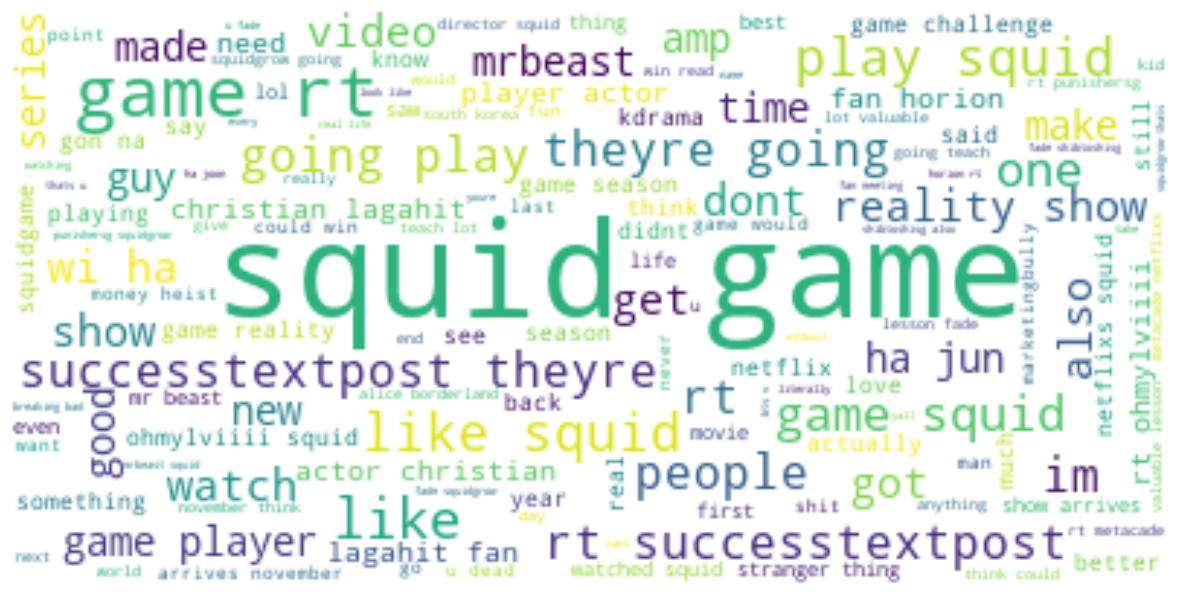

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Download the stopwords if not already downloaded
nltk.download('stopwords')

# Get the stopwords as a set
stopwords = set(stopwords.words('english'))

text = " ".join(data.Text)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
#store the predicted labels in excel file
data.to_excel('predicted.xlsx', index=False)

Generalized Model

In [19]:
#Generalized Model
df = discrimination('predicted.xlsx')
train_tweets, test_tweets, train_labels, test_labels = tweet_label(df)

# Print the lengths of the train and test data and labels
print("Train data length:", len(train_tweets))
print("Train labels length:", len(train_labels))
print("Test data length:", len(test_tweets))
print("Test labels length:", len(test_labels))

text_clf_f = model_training(train_tweets, train_labels, test_tweets, test_labels)


Train data length: 3268
Train labels length: 3268
Test data length: 818
Test labels length: 818
Accuracy: 0.8459657701711492
MAE: 0.19193154034229828


C:\Users\NOM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Alternative Models

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

def model_training_alternative(train_tweets, train_labels, test_tweets, test_labels):
    # Create a pipeline for text classification
    text_clf = Pipeline([
        ('tfidf', TfidfVectorizer()),  # Convert text to TF-IDF features
        ('clf', LinearSVC())  # Train a linear support vector classifier
    ])

    # Fit the pipeline on the training data
    text_clf.fit(train_tweets, train_labels)
    
    # Evaluate the model
    accuracy = text_clf.score(test_tweets, test_labels)
    predictions = text_clf.predict(test_tweets)
    mae = mean_absolute_error(test_labels, predictions)
    print("Accuracy:", accuracy)
    print("MAE:", mae)

    return text_clf

# Load the data and perform preprocessing and label discrimination
data = discrimination('tweets_labeled.xlsx')
train_tweets, test_tweets, train_labels, test_labels = tweet_label(data)

text_clf_alternative = model_training_alternative(train_tweets, train_labels, test_tweets, test_labels)

Accuracy: 0.5925925925925926
MAE: 0.5111111111111111


In [92]:
tweets=data[data['Etiquette '].isna()]['Text']
predictions = text_clf.predict(tweets)
data_alt=data
data_alt.loc[data['Etiquette '].isna(), 'Etiquette '] = predictions 
data_alt

,Text,Etiquette
0,dirait squid game,0.0
1,kanaasoup mini squid game 😂😂😂😂,1.0
2,ultra stamp nerf real reason weapon barely wor...,-1.0
3,husband go call squid game he nightmare alley ...,1.0
4,rt toptenbananas tmbg tmbgtwt picture drew sci...,0.0
...,...,...
4081,transparencyboo make live action persona serie...,-1.0
4082,netflixfr squid game lol,0.0
4083,rt zanexex wtf bootleg poppy playtime squid ga...,-1.0
4084,next episode theyre gon na play game squid gam...,0.0


In [93]:
x = data_alt[data_alt["Etiquette "]==1].count()
y = data_alt[data_alt["Etiquette "]==-1].count()
z = data_alt[data_alt["Etiquette "]==0].count()

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive  ")
    elif (b>a) and (b>c):
        print("Negative  ")
    else:
        print("Neutral  ")
x['Etiquette '], y['Etiquette '], z['Etiquette ']

(1599, 562, 1925)

Already coded libraries

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Text"]]
data = data[["Text", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\NOM\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                Text  Positive  Negative  \
0                                  dirait squid game     0.000     0.000   
1                     kanaasoup mini squid game 😂😂😂😂     0.000     0.000   
2  ultra stamp nerf real reason weapon barely wor...     0.000     0.104   
3  husband go call squid game he nightmare alley ...     0.000     0.000   
4  rt toptenbananas tmbg tmbgtwt picture drew sci...     0.225     0.000   

   Neutral  
0    1.000  
1    1.000  
2    0.896  
3    1.000  
4    0.775  


In [18]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive  ")
    elif (b>a) and (b>c):
        print("Negative  ")
    else:
        print("Neutral  ")
sentiment_score(x, y, z)

Neutral  


RandomForest Model


In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

# Load the data and split it into training and testing sets
data = discrimination('tweets_labeled.xlsx')
train_tweets, test_tweets, train_labels, test_labels = tweet_label(data)

# Create a pipeline for the model
pipeline = Pipeline([
    ('vect', CountVectorizer(max_features=1000)),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Define the hyperparameters to search over
param_grid = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(train_tweets, train_labels)

# Get the best model and its predictions on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(test_tweets)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
mae = mean_absolute_error(test_labels, predictions)

print("Best Model:", best_model)
print("Accuracy:", accuracy)
print("MAE:", mae)



Best Model: Pipeline(steps=[('vect', CountVectorizer(max_features=1000)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 RandomForestClassifier(min_samples_split=10, n_estimators=200,
                                        random_state=42))])
Accuracy: 0.5703703703703704
MAE: 0.5185185185185185


In [60]:
tweets=data[data['Etiquette '].isna()]['Text']
predictions = best_model.predict(tweets)
data_alt_bis=data
data_alt_bis.loc[data['Etiquette '].isna(), 'Etiquette '] = predictions 
data_alt_bis




,Text,Etiquette
0,dirait squid game,0.0
1,kanaasoup mini squid game 😂😂😂😂,1.0
2,ultra stamp nerf real reason weapon barely wor...,-1.0
3,husband go call squid game he nightmare alley ...,1.0
4,rt toptenbananas tmbg tmbgtwt picture drew sci...,0.0
...,...,...
4081,transparencyboo make live action persona serie...,1.0
4082,netflixfr squid game lol,0.0
4083,rt zanexex wtf bootleg poppy playtime squid ga...,1.0
4084,next episode theyre gon na play game squid gam...,0.0


In [127]:
#Sentiment Analysis
x = data_alt_bis[data_alt_bis["Etiquette "]==1].count()
y = data_alt_bis[data_alt_bis["Etiquette "]==-1].count()
z = data_alt_bis[data_alt_bis["Etiquette "]==0].count()

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive  ")
    elif (b>a) and (b>c):
        print("Negative  ")
    else:
        print("Neutral  ")
sentiment_score(x['Etiquette '], y['Etiquette '], z['Etiquette '])

Neutral  


Generalized RandomForest Model

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

# Load the data and split it into training and testing sets
data = data_alt_bis
train_tweets, test_tweets, train_labels, test_labels = tweet_label(data)

# Create a pipeline for the model
pipeline = Pipeline([
    ('vect', CountVectorizer(max_features=1000)),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Define the hyperparameters to search over
param_grid = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(train_tweets, train_labels)

# Get the best model and its predictions on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(test_tweets)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
mae = mean_absolute_error(test_labels, predictions)

print("Best Model:", best_model)
print("Accuracy:", accuracy)
print("MAE:", mae)

Best Model: Pipeline(steps=[('vect', CountVectorizer(max_features=1000)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 RandomForestClassifier(min_samples_split=5, n_estimators=200,
                                        random_state=42))])
Accuracy: 0.8557457212713936
MAE: 0.16503667481662593


Deep Learning Model : using keras from tensorflow

In [95]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Split the data into training and testing sets
train_tweets, test_tweets, train_labels, test_labels = train_test_split(data['Text'], data['Etiquette '], test_size=0.2, random_state=42)

# Tokenize the text and convert it to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_tweets)
train_sequences = tokenizer.texts_to_sequences(train_tweets)
test_sequences = tokenizer.texts_to_sequences(test_tweets)

# Pad the sequences to have equal length
max_sequence_length = max(len(seq) for seq in train_sequences)
train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data, test_labels)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions
predictions = model.predict(test_data)

# Convert predictions to binary labels
predicted_labels = [1 if pred > 0.5 else 0 for pred in predictions]

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(test_labels, predicted_labels)
print("Mean Absolute Error (MAE):", mae)


Epoch 1/10
41/41 [==============================] - 4s 61ms/step - loss: 0.5725 - accuracy: 0.4660 - val_loss: 0.4904 - val_accuracy: 0.4786
Epoch 2/10
41/41 [==============================] - 2s 49ms/step - loss: 0.1077 - accuracy: 0.6285 - val_loss: 2.7967e-04 - val_accuracy: 0.6468
Epoch 3/10
41/41 [==============================] - 2s 52ms/step - loss: -0.7570 - accuracy: 0.7471 - val_loss: -0.2720 - val_accuracy: 0.6651
Epoch 4/10
41/41 [==============================] - 2s 51ms/step - loss: -1.9719 - accuracy: 0.7904 - val_loss: -0.6954 - val_accuracy: 0.6682
Epoch 5/10
41/41 [==============================] - 2s 48ms/step - loss: -3.2748 - accuracy: 0.8263 - val_loss: -0.9224 - val_accuracy: 0.6911
Epoch 6/10
41/41 [==============================] - 2s 50ms/step - loss: -4.3424 - accuracy: 0.8424 - val_loss: -0.7802 - val_accuracy: 0.6835
Epoch 7/10
41/41 [==============================] - 2s 49ms/step - loss: -5.1737 - accuracy: 0.8439 - val_loss: -1.7234 - val_accuracy: 0.6820

In [128]:
#Example
new_tweets = ["Amazing squid game!", "Disappointing finale", "no need for squid game season2"]
new_sequences = tokenizer.texts_to_sequences(new_tweets)
new_data = pad_sequences(new_sequences, maxlen=max_sequence_length)

predictions = model.predict(new_data)

for tweet, prediction in zip(new_tweets, predictions):
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    print(f"Tweet: {tweet} | Sentiment: {sentiment}")


1/1 [==============================] - 0s 30ms/step
Tweet: Amazing squid game! | Sentiment: Positive
Tweet: Disappointing finale | Sentiment: Negative
Tweet: no need for squid game season2 | Sentiment: Negative


In [120]:
# Get the tweets for which 'Etiquette' is missing
data=pd.read_excel('tweets_labeled.xlsx')[['Text','Etiquette ']]
tweets = data[data['Etiquette '].isna()]['Text']
# Convert the tweets to sequences
new_sequences = tokenizer.texts_to_sequences(tweets)

# Pad the sequences to have equal length
new_data = pad_sequences(new_sequences, maxlen=max_sequence_length)

# Make predictions using the trained model
predictions = model.predict(new_data)

# Create a copy of the original data
data_alt_dl = data.copy()

# Update 'Etiquette' column with predictions for missing values
data_alt_dl.loc[data['Etiquette '].isna(), 'Etiquette '] = predictions

# Print the updated data
print(data_alt_dl)


112/112 [==============================] - 1s 9ms/step
                                                   Text    Etiquette 
0          On dirait squid game https://t.co/m1sxB5WKFn  0.000000e+00
1                   @kanaasoup The mini squid game 😂😂😂😂  1.000000e+00
2     ultra stamp nerf for no real reason\n“this wea... -1.000000e+00
3     My husband goes down on me, or as he calls it ...  1.000000e+00
4     RT @toptenbananas: #tmbg #tmbgtwt picture i dr...  0.000000e+00
...                                                 ...           ...
4081  @transparencyboo They should make a live actio...  3.273169e-26
4082                          @NetflixFR Squid game lol  0.000000e+00
4083  RT @zanexex: WTF THERE ARE BOOTLEG POPPY PLAYT...  2.291757e-23
4084  Next episode they're gonna have them play that...  1.114781e-02
4085  RT @pubity: The ‘SQUID GAME’ real-life competi...  1.000000e+00

[4086 rows x 2 columns]


In [129]:
def sentiment_score(a, b, c):
    if (a > b) and (a > c):
        return "Positive"
    elif (b > a) and (b > c):
        return "Negative"
    else:
        return "Neutral"
x = data_alt_dl[data_alt_dl["Etiquette "]>0.5].count()
y = data_alt_dl[data_alt_dl["Etiquette "]<(-0.5)].count()
z = data_alt_dl[(data_alt_dl["Etiquette "] >= (-0.5)) & (data_alt_dl["Etiquette "] <= 0.5)].count()
positive_count = x['Etiquette ']
negative_count = y['Etiquette ']
neutral_count = z['Etiquette ']

sentiment = sentiment_score(positive_count, negative_count, neutral_count)
sentiment


'Neutral'